<a href="https://colab.research.google.com/github/MONAlIS-A/ANN/blob/main/he_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


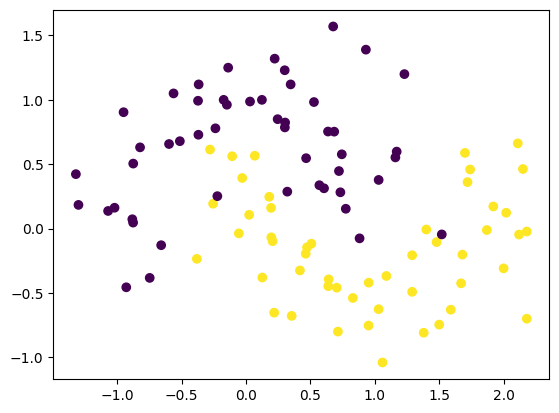

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2, kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Set parameters to 0
model.get_weights()

[array([[ 0.22030203,  0.7392616 , -0.510443  ,  0.50067306,  0.20564485,
          0.98358953,  1.0010617 ,  0.20248762, -0.8093684 , -1.4326584 ],
        [ 0.27214247, -0.2542982 , -1.0304912 , -0.35337356, -0.6415219 ,
         -1.2654123 ,  1.7317591 , -0.42043284, -0.47141504,  0.5197263 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01771833,  0.45492938,  0.48488024,  0.49570978,  0.8416137 ,
          0.6288595 , -0.24894212,  0.95913875, -0.56485325,  0.5723936 ],
        [ 0.95967346, -0.12901159, -0.35127997, -0.3286476 , -0.37025556,
         -0.8902226 ,  0.1919383 ,  0.12306628,  0.40652785, -0.8161518 ],
        [-0.25822246, -0.5128556 ,  0.20250872,  0.28090832,  0.7596286 ,
         -0.29219064, -0.6241619 , -0.30846   , -0.21999949,  0.63949275],
        [ 0.29246074,  0.5763704 , -0.10659972, -0.47936553, -0.45031485,
         -0.40903258, -0.17882383, -0.7951326 , -0.18094075,  0.5744533 ],
        [-0.33887

In [19]:
initial_weights = model.get_weights()

In [20]:
initial_weights[0] = np.random.randn(2, 10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10, 10)*np.sqrt(1/2)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10, 10)*np.sqrt(1/2)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6]  =np.random.randn(10, 10)*np.sqrt(1/2)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] =np.random.randn(10, 1)*np.sqrt(1/2)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [21]:
model.set_weights(initial_weights)

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.get_weights()

[array([[ 0.22030203,  0.7392616 , -0.510443  ,  0.50067306,  0.20564485,
          0.98358953,  1.0010617 ,  0.20248762, -0.8093684 , -1.4326584 ],
        [ 0.27214247, -0.2542982 , -1.0304912 , -0.35337356, -0.6415219 ,
         -1.2654123 ,  1.7317591 , -0.42043284, -0.47141504,  0.5197263 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01771833,  0.45492938,  0.48488024,  0.49570978,  0.8416137 ,
          0.6288595 , -0.24894212,  0.95913875, -0.56485325,  0.5723936 ],
        [ 0.95967346, -0.12901159, -0.35127997, -0.3286476 , -0.37025556,
         -0.8902226 ,  0.1919383 ,  0.12306628,  0.40652785, -0.8161518 ],
        [-0.25822246, -0.5128556 ,  0.20250872,  0.28090832,  0.7596286 ,
         -0.29219064, -0.6241619 , -0.30846   , -0.21999949,  0.63949275],
        [ 0.29246074,  0.5763704 , -0.10659972, -0.47936553, -0.45031485,
         -0.40903258, -0.17882383, -0.7951326 , -0.18094075,  0.5744533 ],
        [-0.33887

In [31]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.4898 - loss: 1.0299 - val_accuracy: 0.5000 - val_loss: 0.9822
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5078 - loss: 0.9129 - val_accuracy: 0.4500 - val_loss: 0.9427
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5055 - loss: 0.8858 - val_accuracy: 0.4500 - val_loss: 0.9041
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4805 - loss: 0.9256 - val_accuracy: 0.5000 - val_loss: 0.8678
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4836 - loss: 0.8797 - val_accuracy: 0.5000 - val_loss: 0.8359
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4695 - loss: 0.8177 - val_accuracy: 0.5000 - val_loss: 0.8082
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4578 - loss: 0.7999 - val_accuracy: 0.5500 - val_loss: 0.7827
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4820 - loss: 0.7930 - val_accuracy: 0.5500 - val_loss

In [32]:
model.get_weights()

[array([[ 0.20723939,  0.6803862 , -0.667422  ,  0.43492943,  0.29749337,
          0.9162284 ,  1.071854  ,  0.3250447 , -0.82490546, -1.6555414 ],
        [ 0.38476276, -0.3670068 , -0.89580345, -0.33659792, -0.74527407,
         -1.1844934 ,  1.6973814 , -0.6567239 , -0.5712946 ,  0.5435583 ]],
       dtype=float32),
 array([-0.03814635, -0.13799897, -0.12088311, -0.11690333,  0.08168869,
        -0.06034913,  0.04990706,  0.12888536,  0.18568386, -0.05499649],
       dtype=float32),
 array([[-0.01877574,  0.33940357,  0.37204134,  0.49780163,  0.77300507,
          0.75748503, -0.1039163 ,  1.091048  , -0.6479428 ,  0.6465482 ],
        [ 0.9036625 , -0.03180519, -0.31928724, -0.30235043, -0.4189289 ,
         -0.84249955,  0.3484079 ,  0.20181985,  0.50325143, -0.9053882 ],
        [-0.3195042 , -0.5320153 ,  0.16863205,  0.41082868,  0.6445345 ,
         -0.07273627, -0.4846508 , -0.09497909, -0.14109634,  0.65300626],
        [ 0.23636244,  0.70524305, -0.036004  , -0.45572898, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

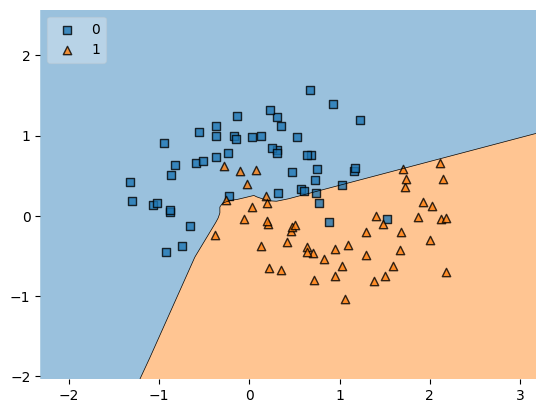

In [33]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)